# Core

> Core functions in Katlas library

## Setup

In [1]:
#| default_exp core

In [2]:
#| hide
import sys
sys.path.append('/notebooks/katlas')
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
#| export
import math, pandas as pd, numpy as np, seaborn as sns
from tqdm import tqdm
from fastcore.basics import partial
from scipy.stats import chi2
from typing import Callable
from functools import partial

## Kinase Data

We will go through how to load kinase information data and phosphorylation sites data.

In [6]:
#| export
class Data:
    """
    A class for fetching various datasets.
    """
    
    # Kinase info
    # KINASE_INFO_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/STkinase_info.parquet"
    KINASE_ALL_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/full_kinase_info.parquet"
    
    # ESM
    # KINASE_ESM_RAW_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/kinase_esm.parquet"
    # KINASE_ESM_PCA_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/kinase_esm_pca32.parquet"
    KINASE_ESM_FULL_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/kinase_esm_full.parquet"
    
    # T5
    # KINASE_T5_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/T5_xl_uniref50.parquet"
    KINASE_T5_FULL_BFD_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/T5_xl_bfd.parquet"
    KINASE_T5_FULL_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/T5_xl_uniref50_full.parquet"
    
    # Amino acid info
    AA_INFO_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/aa_info.parquet"
    AA_FEATURE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/aa_rdkit.parquet"
    AA_MORGAN_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/aa_morgan.parquet"
    
    # Paper raw data
    RAW_KINASE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/paper_raw.parquet"
    NORM_KINASE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/paper_norm.parquet"
    SCALE_KINASE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/paper_scale.parquet"
    
    
    # Unstacked target
    RAW_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_raw.parquet"
    
    # MEDIAN_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_median.parquet"
    # STANDARD_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_standard.parquet"
    # LOG_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_log.parquet"
    
    # Q85_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_q85.parquet"
    # Q85_UP40_UNSTACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/unstack_q85_up40.parquet"
    
    # Stacked target
    # STANDARD_STACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pivot_standard.parquet"
    # LOG_STACK_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pivot_log.parquet"
    
    # Prepared dataset for training
    # DF_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/df_esm64_aa16.parquet"
    
    # Kinase substrate datasets
    KS_DATASET_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/ks_datasets.parquet"
    
    KS_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/ks_main.parquet"
    KS_UPPER_URL ="https://github.com/sky1ove/katlas/raw/main/dataset/ks_main_upper.parquet"
    KS_MAIN_INFO_URL="https://github.com/sky1ove/katlas/raw/main/dataset/ks_main_info.parquet"
    
    KS_OTHERS_URL="https://github.com/sky1ove/katlas/raw/main/dataset/ks_others.parquet"
    KS_OTHERS_INFO_URL="https://github.com/sky1ove/katlas/raw/main/dataset/ks_others_info.parquet"

    # scaled PSPA based on KS format
    PSPA_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pspa_main.parquet"
    PSPA_UPPER_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pspa_main_upper.parquet"
    # original pspa norm data with 0 position
    PSPA_ORIGINAL = "https://github.com/sky1ove/katlas/raw/main/dataset/pspa_original.parquet"
    
    # Combined PSPA and KS
    COMBINE_URL =  "https://github.com/sky1ove/katlas/raw/main/dataset/combine_main.parquet"
    COMBINE_UPPER_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/combine_main_upper.parquet"
    
    # reference databaase
    # For ref of linkedomicsKB, contains unique EnsemblProteinID+site
    CPTAC_KB_URL = "https://github.com/sky1ove/katlas/raw/main/phosphosites/linkedOmicsKB_ref_pan.parquet"
    # From the above, but keep the unique site seq, with gene_site separated by |
    CPTAC_UNIQUE_URL = "https://github.com/sky1ove/katlas/raw/main/phosphosites/cptac_unique_site.parquet"
    # for ref of linkedomics, contains unique Gene+site
    CPTAC_URL = "https://github.com/sky1ove/katlas/raw/main/phosphosites/linkedOmics_ref_pan.parquet"
    # from pplus, contains Gene+site
    PPLUS_HUMAN_URL = "https://github.com/sky1ove/katlas/raw/main/phosphosites/pplus_human.parquet"
    # from ochoa et al. The functional landscape of the human phosphoproteome
    OCHOA_URL = "https://github.com/sky1ove/katlas/raw/main/phosphosites/ochoa_site.parquet"
    # combined PPLUS low throughput and ochoa
    COMBINE_PPLUS_OCHOA_URL = "https://github.com/sky1ove/katlas/raw/main/phosphosites/combine_site_ochoa_pplus.parquet"
    
    # scoring via PSPA (all capital)
    OCHOA_PSPA_SCORE_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/ochoa_pspa_score.parquet"

    # PSPA number of random amino acids
    PSPA_NUM_RANDOM_URL = "https://github.com/sky1ove/katlas/raw/main/dataset/pspa_divide_num.csv"
    

    
    @staticmethod
    def _fetch_data(url):
        """
        Fetches the data from the given URL and returns a DataFrame
        """
        df = pd.read_parquet(url)
        if 'Unnamed: 0' in df.columns:
            df = df.rename(columns={'Unnamed: 0': 'kinase'})
        return df
    
    @staticmethod
    def get_pct_ref():
        return Data._fetch_data(Data.OCHOA_PSPA_SCORE_URL)
    

    @staticmethod
    def get_pspa_raw():
        return Data._fetch_data(Data.RAW_KINASE_URL)
    
    @staticmethod
    def get_pspa_norm():
        return Data._fetch_data(Data.NORM_KINASE_URL)
    
    
    @staticmethod
    def get_pspa_scale():
        return Data._fetch_data(Data.SCALE_KINASE_URL)

    # @staticmethod
    # def get_kinase_info():
    #     return Data._fetch_data(Data.KINASE_INFO_URL)

    @staticmethod
    def get_kinase_info_full():
        return Data._fetch_data(Data.KINASE_ALL_URL)
    
    # @staticmethod
    # def get_esm():
    #     return Data._fetch_data(Data.KINASE_ESM_RAW_URL)

    @staticmethod
    def get_esm_full():
        return Data._fetch_data(Data.KINASE_ESM_FULL_URL)

    # @staticmethod
    # def get_t5():
    #     return Data._fetch_data(Data.KINASE_T5_URL)

    @staticmethod
    def get_t5_full():
        return Data._fetch_data(Data.KINASE_T5_FULL_URL)
    
    @staticmethod
    def get_t5_bfd_full():
        return Data._fetch_data(Data.KINASE_T5_FULL_BFD_URL)

    @staticmethod
    def get_aa_info():
        return Data._fetch_data(Data.AA_INFO_URL)

    @staticmethod
    def get_aa_feature():
        return Data._fetch_data(Data.AA_FEATURE_URL)

#     @staticmethod
#     def get_unstack_standard():
#         return Data._fetch_data(Data.STANDARD_UNSTACK_URL)

#     @staticmethod
#     def get_unstack_log():
#         return Data._fetch_data(Data.LOG_UNSTACK_URL)

#     @staticmethod
#     def get_unstack_med():
#         return Data._fetch_data(Data.MEDIAN_UNSTACK_URL)

#     @staticmethod
#     def get_unstack_raw():
#         return Data._fetch_data(Data.RAW_UNSTACK_URL)

#     @staticmethod
#     def get_unstack_q85():
#         return Data._fetch_data(Data.Q85_UNSTACK_URL)

#     @staticmethod
#     def get_unstack_q85_up40():
#         return Data._fetch_data(Data.Q85_UP40_UNSTACK_URL)

#     @staticmethod
#     def get_log_stack():
#         return Data._fetch_data(Data.LOG_STACK_URL)

#     @staticmethod
#     def get_standard_stack():
#         return Data._fetch_data(Data.STANDARD_STACK_URL)

#     @staticmethod
#     def get_prepared_data():
#         return Data._fetch_data(Data.DF_URL)
    
    @staticmethod
    def get_ks_dataset():
        df = Data._fetch_data(Data.KS_DATASET_URL)
        #Convert the number in the column name into integer
        df.columns = [int(col) if col.lstrip('-').isdigit() else col for col in df.columns]
        return df
        
    @staticmethod
    def get_ks():
        return Data._fetch_data(Data.KS_URL)
    
    @staticmethod
    def get_ks_upper():
        return Data._fetch_data(Data.KS_UPPER_URL)
    
    @staticmethod
    def get_ks_main_info():
        return Data._fetch_data(Data.KS_MAIN_INFO_URL)
    
    @staticmethod
    def get_ks_others():
        return Data._fetch_data(Data.KS_OTHERS_URL)
    
    @staticmethod
    def get_ks_others_info():
        return Data._fetch_data(Data.KS_OTHERS_INFO_URL)
    
    @staticmethod
    def get_pspa_upper():
        return Data._fetch_data(Data.PSPA_UPPER_URL)
    
    @staticmethod
    def get_pspa():
        return Data._fetch_data(Data.PSPA_URL)
    
    @staticmethod
    def get_pspa_original():
        return Data._fetch_data(Data.PSPA_ORIGINAL)
    
    @staticmethod
    def get_combine_upper():
        return Data._fetch_data(Data.COMBINE_UPPER_URL)
    
    @staticmethod
    def get_combine():
        return Data._fetch_data(Data.COMBINE_URL)
    
    
    # unique gene+site, but less cases
    @staticmethod
    def get_cptac_gene_site():
        return Data._fetch_data(Data.CPTAC_URL)
    
    # ensemblID + site, with more sites
    @staticmethod
    def get_cptac_ensembl_site():
        return Data._fetch_data(Data.CPTAC_KB_URL)
    
    @staticmethod
    def get_pplus_human_site():
        return Data._fetch_data(Data.PPLUS_HUMAN_URL)
    
    @staticmethod
    def get_ochoa_site():
        return Data._fetch_data(Data.OCHOA_URL)
    
    @staticmethod
    def get_cptac_unique_site():
        return Data._fetch_data(Data.CPTAC_UNIQUE_URL)
    
    @staticmethod
    def get_combine_site_pplus_ochoa():
        
        df = Data._fetch_data(Data.COMBINE_PPLUS_OCHOA_URL)
        
        #Convert the number in the column name into integer
        df.columns = [int(col) if col.lstrip('-').isdigit() else col for col in df.columns]
        return df
    
    
    @staticmethod
    def get_num_dict():
        """
        Fetches the data from the given URL and returns a DataFrame
        """
        num = pd.read_csv(Data.PSPA_NUM_RANDOM_URL)
        num_dict = num.set_index('kinase')['num_random_aa'].to_dict()

        return num_dict

Datasets used in this study can be accessed through `Data`

| Data | Description |
|------|-------------|
| <center>**Kinase-substrate dataset**</center> |  |
| get_ks_dataset | kinase-substrate dataset |
|  |  |
| <center>**Amino acids**</center> |  |
| get_aa_info | amino acid information |
| get_aa_feature | amino acid extracted through rdkit feature |
|  |  |
| <center>**Kinase information**</center> |  |
| get_kinase_info_full | 523 full kinase information |
| get_ks_main_info | counting information of KS kinase |
| get_ks_others_info | counting information of other kinase |
|  |  |
| <center>**Protein embeddings**</center> |  |
| get_esm_full | full kinase esm feature |
| get_t5_full | full kinase t5 feature |
| get_t5_bfd_full | full kinase t5 bfd feature |
|  |  |
| <center>**PSSM**</center> |  |
| get_pspa_raw | PSPA raw data, index is kinase, column is position+amino acid |
| get_pspa_norm | PSPA normalized data; format is same with the above |
| get_pspa_scale | PSPA scaled data; format is same with the above |
| get_pspa_original | PSPA normalized data; with additional position 0 information |
| get_pspa | PSPA normalized data with additional position-wise normalization |
| get_pspa_upper | position normalized pspa data with lowercase sty + capital STY |
| get_ks | PSSM from kinase-substrate dataset |
| get_ks_upper | PSSM from kinase-substrate dataset for upper case |
| get_ks_others | PSSM of other kinase (mutation, lipid kinase) from kinase-substrate dataset |
| get_combine_upper | combined PSPA and KS PSSM for upper, by adding lowercase sty + capital STY |
| get_combine | combined PSPA and KS PSSM |
|  |  |
| <center>**Phosphorylation sites**</center> |  |
| get_cptac_gene_site | CPTAC unique gene+phosphoryaltion site |
| get_cptac_ensembl_site | cptac unique ensembl + phosphorylation site |
| get_pplus_human_site | phosphoplus kinase-substrate human site |
| get_ochoa_site | ochoa et al. human phosphoproteomics |
| get_cptac_unique_site | cptac unique phosphorylation site |
| get_combine_site_pplus_ochoa | phosphoplus lowthroughput site + ochoa et al. human phosphoproteomics |


To load raw and normalized PSPA data:

In [ ]:
raw = Data.get_pspa_raw().set_index('kinase')
norm = Data.get_pspa_norm().set_index('kinase')
norm.head()

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,...,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,0.0720,0.0245,0.0284,0.0456,0.0425,0.0425,0.0951,0.1554,0.0993,0.0864,...,0.0560,0.0831,0.0928,0.0635,0.0592,0.0389,0.0457,0.0251,0.0251,0.0270
ACVR2A,0.0415,0.0481,0.0584,0.0489,0.0578,0.0578,0.0598,0.0625,0.0596,0.0521,...,0.0573,0.0527,0.0491,0.0616,0.0556,0.0640,0.0640,0.0703,0.0703,0.0589
ACVR2B,0.0533,0.0517,0.0566,0.0772,0.0533,0.0533,0.0543,0.0442,0.0471,0.0516,...,0.0561,0.0451,0.0486,0.0585,0.0532,0.0730,0.0697,0.0761,0.0761,0.0637
AKT1,0.0603,0.0594,0.0552,0.0605,0.0516,0.0516,0.0427,0.0435,0.0464,0.0505,...,0.0663,0.1145,0.1082,0.0735,0.0649,0.0443,0.0312,0.0393,0.0393,0.0263
AKT2,0.0602,0.0617,0.0643,0.0582,0.0534,0.0534,0.0433,0.0418,0.0493,0.0513,...,0.0679,0.1155,0.0990,0.0652,0.0623,0.0362,0.0350,0.0548,0.0548,0.0417


To load kinase information data:

In [ ]:
kinase = Data.get_kinase_info_full()
kinase.head()

,kinase,ID_coral,uniprot,ID_HGNC,group,family,subfamily_coral,subfamily,in_paper,pseudo,...,range,human_uniprot_sequence,full_sequence_paper,sequence,category,category_big,cluster,length,kinasecom_domain,hdbscan
0,AAK1,AAK1,Q2M2I8,AAK1,Other,NAK,None,NAK,1,0,...,aa27-365,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,TSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCA...,NAK,NAK,18.0,339,VTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREI...,3.0
1,ABL1,ABL1,P00519,ABL1,TK,Abl,None,Abl,0,0,...,Full length,MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAA...,MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAA...,MLEICLKLVGCKSKKGLSSSSSCYLEEALQRPVASDFEPQGLSEAA...,None,None,NaN,1130,ITMKHKLGGGQYGEVYEGVWKKYSLTVAVKTLKEDTMEVEEFLKEA...,NaN
2,ABL2,ABL2,P42684,ABL2,TK,Abl,None,Abl,0,0,...,Full length,MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTTETGF...,MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTTETGF...,MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTTETGF...,None,None,NaN,1182,ITMKHKLGGGQYGEVYVGVWKKYSLTVAVKTLKEDTMEVEEFLKEA...,NaN
3,TNK2,ACK,Q07912,TNK2,TK,Ack,None,Ack,0,0,...,Full length,MQPEEGTGWLLELLSEVQLQQYFLRLRDDLNVTRLSHFEYVKNEDL...,MQPEEGTGWLLELLSEVQLQQYFLRLRDDLNVTRLSHFEYVKNEDL...,MQPEEGTGWLLELLSEVQLQQYFLRLRDDLNVTRLSHFEYVKNEDL...,None,None,NaN,1038,LRLLEKLGDGSFGVVRRGEWDAPSGKTVSVAVKCLKPDVLSQPEAM...,NaN
4,ACVR2A,ACTR2,P27037,ACVR2A,TKL,STKR,STKR2,STKR2,1,0,...,aa162-end,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTG...,MGAAAKLAFAVFLISCSSGAILGRSETQECLFFNANWEKDRTNQTG...,RHHKMAYPPVLVPTQDPGPPPPSPLLGLKPLQLLEVKARGRFGCVW...,TGFBR,acidophilic,23.0,352,LQLLEVKARGRFGCVWKAQLLNEYVAVKIFPIQDKQSWQNEYEVYS...,3.0


## CPTAC Data

In [ ]:
#| export
class CPTAC:
    
    "A class for fetching CPTAC phosphoproteomics data."
    
#     # Phosphoproteomics (Tumor)
#     HNSCC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/HNSCC/HNSCC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
#     GBM = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/GBM/GBM_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
#     COAD = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/COAD/COAD_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
#     CCRCC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/CCRCC/CCRCC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
#     LSCC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/LSCC/LSCC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
#     BRCA = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/BRCA/BRCA_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
#     UCEC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/UCEC/UCEC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
#     LUAD = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/LUAD/LUAD_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
#     PDAC = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/PDAC/PDAC_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
#     OV = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/OV/OV_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt"
    
#     # Phosphoproteomics (Normal)
#     HNSCC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/HNSCC/HNSCC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
#     GBM_normal = None
#     COAD_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/COAD/COAD_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
#     CCRCC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/CCRCC/CCRCC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
#     LSCC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/LSCC/LSCC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
#     BRCA_normal = None
#     UCEC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/UCEC/UCEC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
#     LUAD_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/LUAD/LUAD_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
#     PDAC_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/PDAC/PDAC_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
#     OV_normal = "https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/OV/OV_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt"
    
#     # Ensemble ID gene mapping
#     HNSCC_ID = "https://zenodo.org/records/8196130/files/bcm-hnscc-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
#     GBM_ID = "https://zenodo.org/records/8196130/files/bcm-gbm-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
#     COAD_ID = "https://zenodo.org/records/8196130/files/bcm-coad-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
#     CCRCC_ID = "https://zenodo.org/records/8196130/files/bcm-ccrcc-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
#     LSCC_ID = "https://zenodo.org/records/8196130/files/bcm-lscc-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
#     BRCA_ID = "https://zenodo.org/records/8196130/files/bcm-brca-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
#     UCEC_ID = "https://zenodo.org/records/8196130/files/bcm-ucec-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
#     LUAD_ID = "https://zenodo.org/records/8196130/files/bcm-luad-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
#     PDAC_ID = "https://zenodo.org/records/8196130/files/bcm-pdac-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
#     OV_ID = "https://zenodo.org/records/8196130/files/bcm-ov-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
    
    
    @staticmethod
    def _fetch_data(cancer: str, # cancer type CPTAC
                    is_Tumor: bool=True, # tumor tissue or normal
                    is_KB: bool=False, # whether it is for LinkedOmicsKB or LinkedOmics
                   ):
        "Fetches the data from the given URL and returns a DataFrame"
        
        # URL of ID and data
        sample_type = "Tumor" if is_Tumor else "Normal"
        ID_URL = f"https://zenodo.org/records/8196130/files/bcm-{cancer.lower()}-mapping-gencode.v34.basic.annotation-mapping.txt.gz"
        DATA_URL = f"https://cptac-pancancer-data.s3.us-west-2.amazonaws.com/data_freeze_v1.2_reorganized/{cancer.upper()}/{cancer.upper()}_phospho_site_abundance_log2_reference_intensity_normalized_{sample_type}.txt"

        # Load ID data
        ref = pd.read_csv(ID_URL, compression='gzip', sep='\t')[['protein','gene','gene_name']].drop_duplicates().reset_index(drop=True)
        
        # Load CPTAC phosphoproteomics data
        try:
            raw = pd.read_csv(DATA_URL, sep='\t')
        except Exception as e:
            print(f'{cancer} has {e}')
        else:
            info = pd.DataFrame({'gene':raw.idx.str.split('|').str[0],
                                 'site':raw.idx.str.split('|').str[2],
                                 'site_seq':raw.idx.str.split('|').str[3]})

            print(f'the {cancer} dataset length is: {info.shape[0]}')

            # Merge ensembl ID with gene name
            info = info.merge(ref,'left')
            print(f'after id mapping, the length is {info.shape[0]}')

            print(f'{info.gene_name.isna().sum()} sites does not have a mapped gene name')

            info['gene_site'] = info['gene_name'] + '_' + info['site']
            info['protein_site'] = info['protein'].str.split('.').str[0] + '_' + info['site']
            
            info = info.drop_duplicates(subset="protein_site" if is_KB else "gene_site").reset_index(drop=True)
            print(f'after removing duplicates of protein_site, the length is {info.shape[0]}')

            return info
    
    
    @staticmethod
    def list_cancer():
        "Get available CPTAC cancer type"
        return ['HNSCC','GBM','COAD','CCRCC','LSCC','BRCA','UCEC','LUAD','PDAC','OV']

    @staticmethod
    def get_id(cancer_type: str,
               is_Tumor: bool=True, # tumor tissue or normal
               is_KB: bool=False, # whether it is for LinkedOmicsKB or LinkedOmics
              ):
        "Get CPTAC phosphorylation sites information given a cancer type"
        assert cancer_type in CPTAC.list_cancer(), "cancer type is not included, check available cancer types from CPTAC.list_cancer()"
        return CPTAC._fetch_data(cancer_type,is_Tumor, is_KB)

To check available cancer types, use `CPTAC.list_cancer()`

In [ ]:
CPTAC.list_cancer()

['HNSCC', 'GBM', 'COAD', 'CCRCC', 'LSCC', 'BRCA', 'UCEC', 'LUAD', 'PDAC', 'OV']

To load CPTAC phosphorylation site information, use `CPTAC.get_id()`. Fold change of various conditions can be acquired through [LinkedOmics](https://www.linkedomics.org/login.php) or [LinkedOmicsKB](https://kb.linkedomics.org/). Use `is_KB` to indicate whether the phosphorylation site information is for LinkedOmics or LinkedOmicsKB.

In [ ]:
# Example of getting phosphorylation site information
tumor = CPTAC.get_id('CCRCC',is_KB=True)
normal = CPTAC.get_id('CCRCC',is_KB=True, is_Tumor=False)
tumor.head()

the CCRCC dataset length is: 54238
after id mapping, the length is 213737
0 sites does not have a mapped gene name
after removing duplicates of protein_site, the length is 212814
the CCRCC dataset length is: 53152
after id mapping, the length is 209188
0 sites does not have a mapped gene name
after removing duplicates of protein_site, the length is 208298


,gene,site,site_seq,protein,gene_name,gene_site,protein_site
0,ENSG00000003056.8,S267,DDQLGEESEERDDHL,ENSP00000000412.3,M6PR,M6PR_S267,ENSP00000000412_S267
1,ENSG00000003056.8,S267,DDQLGEESEERDDHL,ENSP00000440488.2,M6PR,M6PR_S267,ENSP00000440488_S267
2,ENSG00000048028.11,S1053,PPTIRPNSPYDLCSR,ENSP00000003302.4,USP28,USP28_S1053,ENSP00000003302_S1053
3,ENSG00000048028.11,S1053,PPTIRPNSPYDLCSR,ENSP00000445743.1,USP28,USP28_S1053,ENSP00000445743_S1053
4,ENSG00000048028.11,S1053,PPTIRPNSPYDLCSR,ENSP00000442431.1,USP28,USP28_S1053,ENSP00000442431_S1053


## Data processing

In [ ]:
#| export
def get_unique_site(df:pd.DataFrame = None,# dataframe that contains phosphorylation sites
                    seq_col: str='site_seq', # column name of site sequence
                    id_col: str='gene_site' # column name of site id
                   ):
    "Remove duplicates among phosphorylation sites; return df with new columns of acceptor and number of duplicates"
    
    unique = df.groupby(seq_col).agg(
        {id_col: lambda r: '|'.join(r.unique())} )
    unique['num_site'] = unique[id_col].str.split('|').apply(len) 
    unique = unique.reset_index()
    position = len(unique[seq_col][0])//2
    unique['acceptor'] = unique[seq_col].str[position]
    
    return unique

As there are lots of duplicates of the phosphorylation site sequence in the dataset, it could be helpful to remove the duplicated sequences. 

Implement `get_unique_site` to get unique phosphorylation sites. Need to inform columns of sequence and id.

In [ ]:
df = Data.get_ochoa_site()
unique = get_unique_site(df,seq_col='site_seq',id_col='gene_site')
unique.sort_values('num_site',ascending=False).head()

,site_seq,gene_site,num_site,acceptor
59397,PDYRQNVYIPGSNAT,PCDGC_Y896|PCDGK_Y898|PCDGG_Y887|PCDGM_Y908|PC...,21,Y
96321,TMGLSARYGPQFTLQ,PCDGC_Y879|PCDGK_Y881|PCDGG_Y870|PCDGM_Y891|PC...,21,Y
96147,TLQHVPDYRQNVYIP,PCDGC_Y891|PCDGK_Y893|PCDGG_Y882|PCDGM_Y903|PC...,21,Y
11223,DKFIIPGSPAIISIR,PCDC1_S906|PCDA7_S880|PCDA6_S893|PCDAC_S884|PC...,14,S
18666,ELAKHAVSEGTKAVT,H2B1K_S113|H2BFS_S113|H2B1D_S113|H2B1C_S113|H2...,12,S


In [ ]:
#| export 
def convert_string(input_string:str):
    
    "Convert amino acids of lower case other than s,t,y to capital; convert rare amino acids to _"
    
    allowed_chars = 'PGACSTVILMFYWHKRQNDEsty'
    result = ""
    for char in input_string:
        # convert non-s/t/y to upper case
        result_char = char if char in ['s', 't', 'y'] else char.upper()
        # Replace with underscore if the character is not in the allowed set
        result += result_char if result_char in allowed_chars else '_'
    return result

In many phosphorylation datsets, there are amino acids in the site sequence that are in lower case but does not belong to s/t/y. Also, there are uncommon amino acids such as U or O that appear in the sequence. Therefore, it is essential to convert the sequence string for kinase ranking.

In [ ]:
# example
convert_string('AAkUuPRFstTH')

'AAK__PRFstTH'

In [ ]:
#| export
def checker(input_string):
    "Check if the input string contains non-s/t/y at the middle position"
    acceptor = input_string[len(input_string)//2]
    assert acceptor.lower() in list('sty'),f"{input_string} has {acceptor} at position 0; need to have one of s,t and y"

def STY2sty(input_string: str):
    "Replace 'STY' with 'sty'"    
    return input_string.replace('S', 's').replace('T', 't').replace('Y', 'y')

In [ ]:
checker('AAkUuPSFstTH') # if the center amino acid does not belong to sty/STY, will raise an error

STY2sty('AAkUuPSFSTtH') # convert all capital STY to sty in a string

'AAkUuPsFsttH'

In [ ]:
#| export 
def cut_seq(input_string: str, # site sequence
            min_position: int, # minimum position relative to its center
            max_position: int, # maximum position relative to its center
            ):
    
    "Extract sequence based on a range relative to its center position"
    
    # Find the center position of the string
    center_position = len(input_string) // 2

    # Calculate the start and end indices
    start_index = max(center_position + min_position, 0)  # Ensure start_index is not negative
    end_index = min(center_position + max_position + 1, len(input_string))  # Ensure end_index does not exceed string length

    # Extract and return the substring
    return input_string[start_index:end_index]

In [ ]:
cut_seq('AAkUuPSFSTtH',-5,4)

'AkUuPSFSTt'

## Data collection

In [ ]:
#| export
def extract_site_seq(df: pd.DataFrame, # dataframe that contains protein sequence
                     seq_col: str, # column name of protein sequence
                     position_col: str # column name of position 0
                    ):
    "Based on position 0, extract -7 to +7 site sequence from protein sequence"
    
    data = []
    for i, r in tqdm(df.iterrows(),total=len(df)):
        position = r[position_col] - 1
        start = position - 7
        end = position + 8

        # Extract the subsequence
        subseq = r[seq_col][max(0, start):min(len(r[seq_col]), end)]

        # Pad the subsequence if needed
        if start < 0:
            subseq = "_" * abs(start) + subseq
        if end > len(r[seq_col]):
            subseq = subseq + "_" * (end - len(r[seq_col]))

        data.append(subseq)
        
    return np.array(data)

As some datasets only contains protein information and position of phosphorylation sites, but not phosphorylation site sequence, we can retreive protein sequence and use this function to get -7 to +7 phosphorylation site sequence (as numpy array).

Remember to validate the phospho-acceptor at position 0 before extract the site sequence, as there could be mismatch due to the protein sequence database updates.

In [ ]:
df = Data.get_ochoa_site().head()
extract_site_seq(df,seq_col='Sequence',position_col='position')

100%|██████████| 5/5 [00:00<00:00, 7211.66it/s]


array(['VDDEKGDSNDDYDSA', 'YDSAGLLSDEDCMSV', 'IADHLFWSEETKSRF',
       'KSRFTEYSMTSSVMR', 'FTEYSMTSSVMRRNE'], dtype='<U15')

## Data Process

In [ ]:
#| export
def raw2norm(df: pd.DataFrame, # single kinase's df has position as index, and single amino acid as columns
             PDHK: bool=False, # whether this kinase belongs to PDHK family 
            ):
    
    "Normalize single kinase data"
    columns_to_exclude = ['S', 'T', 'C', 't', 'y']
    
    if PDHK:
        columns_to_exclude.append('Y')
        divisor = 16
    else:
        divisor = 17
    
    s = df.drop(columns=columns_to_exclude).sum(1)
    df2 = df.div(s, axis=0)
    df2.C = df2.C / (df2.C.median() * divisor)
    df2['S'] = df2.drop(columns=columns_to_exclude).median(1)
    df2['T'] = df2.drop(columns=columns_to_exclude).median(1)
    df2 = round(df2, 4)
    
    return df2

This function implement the normalization method from [Johnson et al. Nature: An atlas of substrate specificities for the human serine/threonine kinome](https://www.nature.com/articles/s41586-022-05575-3#Sec6)

Specifically,
> - matrices were column-normalized at all positions by the sum of the 17 randomized amino acids (excluding serine, threonine and cysteine), to yield PSSMs. 
>- PDHK1 and PDHK4 were normalized to the 16 randomized amino acids (excluding serine, threonine, cysteine and additionally tyrosine)
>- The cysteine row was scaled by its median to be 1/17 (1/16 for PDHK1 and PDHK4). 
>- The serine and threonine values in each position were set to be the median of that position.
>- The S0/T0 ratio was determined by summing the values of S and T rows in the matrix (SS and ST, respectively), accounting for the different S vs. T composition of the central (1:1) and peripheral (only S or only T) positions (Sctrl and Tctrl, respectively), and then normalizing to the higher value among the two (S0 and T0, respectively, Supplementary Note 1)

This function is usually implemented with the below function, with `normalize` being a bool argument.

In [ ]:
#| export
def get_one_kinase(df: pd.DataFrame, #stacked dataframe (paper's raw data)
                   kinase:str, # a specific kinase
                   normalize: bool=False, # normalize according to the paper; special for PDHK1/4
                   drop_s: bool= True # drop s if s is in column, specifically for PSPA raw data
                   ):
    "Obtain a specific kinase data from stacked dataframe"
    
    p = pd.DataFrame(df.loc[kinase],columns = [kinase]).reset_index().rename(columns={'index':'substrate'})
    p['position'] = p.substrate.str.extract('(-?\d+)')
    p['aa'] = p.substrate.str[-1]
    p.position = p.position.astype(int)
    pp = p.pivot(index='position', columns='aa', values=kinase)
    if drop_s:
        if 's' in pp.columns:
            pp = pp.drop(columns=['s'])

    if normalize:
        pp = raw2norm(pp, PDHK=True if kinase == 'PDHK1' or kinase == 'PDHK4' else False)
    return pp

Retreive a single kinase data from PSPA data that has an format of kinase as index and position+amino acid as column.

In [ ]:
raw = Data.get_pspa_raw().set_index('kinase')
one_kinase = get_one_kinase(raw,'PDHK1')
one_kinase.head()

aa,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,t,y
position,,,,,,,,,,,,,,,,,,,,,
-5,8742435.33,10414182.29,8663835.37,8096013.86,11402696.32,10253402.14,10105837.98,8683931.90,7578162.13,9660152.81,...,6637930.10,6242275.07,8735083.42,17325761.72,10840094.13,8430649.60,14729350.10,11402696.32,8575155.23,9671765.02
-4,9382375.57,10685938.26,8357249.08,7761083.75,11217909.10,10855959.77,9079043.40,9130790.82,7898317.44,9322057.05,...,9672268.74,8379245.47,9377210.68,10952415.10,9895845.34,7886254.77,13908900.76,11217909.10,8025228.06,11415154.10
-3,9566806.27,10274228.62,7860338.75,6664677.78,12646646.40,9136758.39,10619788.43,10815274.55,7575486.39,10510394.47,...,8973502.17,8383343.00,8378836.06,15571737.29,10373422.50,9253028.96,17526458.60,12646646.40,6558017.14,8706611.00
-2,8874823.78,11219554.16,7104673.31,6607581.65,11937469.77,13445698.89,11887506.94,8049058.41,6643874.14,9617614.67,...,7548109.53,8208440.55,9307590.91,20205849.32,13325121.79,7839573.90,16355323.34,11937469.77,4944830.56,8422409.78
-1,10110169.52,14777201.90,12784916.61,5507173.44,8406884.45,8990141.98,10109111.77,6409587.79,5295768.52,7469514.59,...,6981606.35,6472612.56,6069925.70,19309187.20,22395646.37,6650117.78,9773567.40,8406884.45,4625731.13,5606047.19


Set normalize to True can normalize the data based on previous normalization method.

In [ ]:
one_normalized = get_one_kinase(raw,'PDHK1',normalize=True)
one_normalized.head()

aa,A,C,D,E,F,G,H,I,K,L,...,P,Q,R,S,T,V,W,Y,t,y
position,,,,,,,,,,,,,,,,,,,,,
-5,0.0594,0.0625,0.0589,0.0550,0.0775,0.0697,0.0687,0.0590,0.0515,0.0657,...,0.0451,0.0424,0.0594,0.0594,0.0594,0.0573,0.1001,0.0775,0.0583,0.0658
-4,0.0618,0.0621,0.0550,0.0511,0.0739,0.0715,0.0598,0.0601,0.0520,0.0614,...,0.0637,0.0552,0.0617,0.0608,0.0608,0.0519,0.0916,0.0739,0.0528,0.0752
-3,0.0608,0.0576,0.0499,0.0423,0.0803,0.0580,0.0674,0.0687,0.0481,0.0667,...,0.0570,0.0532,0.0532,0.0584,0.0584,0.0588,0.1113,0.0803,0.0416,0.0553
-2,0.0587,0.0655,0.0470,0.0437,0.0790,0.0890,0.0787,0.0533,0.0440,0.0637,...,0.0500,0.0543,0.0616,0.0565,0.0565,0.0519,0.1082,0.0790,0.0327,0.0557
-1,0.0782,0.1009,0.0989,0.0426,0.0650,0.0695,0.0782,0.0496,0.0409,0.0578,...,0.0540,0.0500,0.0469,0.0594,0.0594,0.0514,0.0756,0.0650,0.0358,0.0433


To further scale the data based on the scaling method from [Johnson et al. Nature: An atlas of substrate specificities for the human serine/threonine kinome](https://www.nature.com/articles/s41586-022-05575-3#Sec6), we can multiply all values by a certain factor (16 for most kinases, and 17 for PDHK)

>All kinases are divided by 1/17 (#Random AA); PDHK1 or 4 are divided by 1/16.

In [ ]:
# multiply all values by 16 or 17
scale2 = norm.apply(lambda r: r*16 if 'PDHK' in r.name else r*17, axis=1)

# original PSPA scaled data from Johnson et al.
scale = Data.get_pspa_scale().set_index('kinase')

We can compare the calculated one with the original one from the paper. They are same.

In [ ]:
scale.head(2).round(2)

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,...,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,1.22,0.42,0.48,0.78,0.72,0.72,1.62,2.64,1.69,1.47,...,0.95,1.41,1.58,1.08,1.01,0.66,0.78,0.43,0.43,0.46
ACVR2A,0.71,0.82,0.99,0.83,0.98,0.98,1.02,1.06,1.01,0.89,...,0.97,0.90,0.84,1.05,0.95,1.09,1.09,1.20,1.20,1.00


In [ ]:
scale2.head(2).round(2)

,-5P,-5G,-5A,-5C,-5S,-5T,-5V,-5I,-5L,-5M,...,4H,4K,4R,4Q,4N,4D,4E,4s,4t,4y
kinase,,,,,,,,,,,,,,,,,,,,,
AAK1,1.22,0.42,0.48,0.78,0.72,0.72,1.62,2.64,1.69,1.47,...,0.95,1.41,1.58,1.08,1.01,0.66,0.78,0.43,0.43,0.46
ACVR2A,0.71,0.82,0.99,0.83,0.98,0.98,1.02,1.06,1.01,0.89,...,0.97,0.90,0.83,1.05,0.95,1.09,1.09,1.20,1.20,1.00


In [ ]:
#| export
def unstack(df: pd.DataFrame, # stacked dataframe
            name:str='target' # column name of values 
           ):
    "Unstack and split PSPA data"
    
    # Unstack
    df = df.unstack().reset_index(name = name)
    
    # Rename column
    df = df.rename(columns = {'level_0':'substrate'})
    
    # Reorder column
    df = df[['kinase','substrate',name]]
    
    # Deal with some warning issue
    df = df.copy()
    
    # Divide substrate info into position and aa
    df['position'] = df.substrate.str.extract('(-?\d+)')
    df['aa'] = df.substrate.str[-1]
    
    # Remove 's' as it is a duplicate of 't'
    df = df[df['aa'] != 's'].reset_index(drop=True)
    
    return df

As the original PSPA data is in a format with index as kinase and column as position+amino acid, we can unstack the dataframe, and split the column to position and amino acid.

In [ ]:
unstack(raw).head()

,kinase,substrate,target,position,aa
0,AAK1,-5P,7614134.38,-5,P
1,ACVR2A,-5P,4991039.28,-5,P
2,ACVR2B,-5P,26480329.10,-5,P
3,AKT1,-5P,18399509.29,-5,P
4,AKT2,-5P,5439237.54,-5,P


In [ ]:
#| export
def get_metaP(p_values):
    
    "Use Fisher's method to calculate a combined p value given a list of p values; this function also allows negative p values (negative correlation)"

    logs = [math.log(abs(p))*-1 if p<0 else math.log(abs(p)) for p in p_values]
    chi_square_stat = -2 * sum(logs)
    degrees_of_freedom = 2 * len(p_values)
    score = stats.chi2.sf(abs(chi_square_stat), degrees_of_freedom)*-1 if chi_square_stat<0 else chi2.sf(abs(chi_square_stat), degrees_of_freedom)

    return score

In [ ]:
p_values = [0.001,-0.5,0.002]

get_metaP(p_values)

0.0003626876953231754

## Predict kinase given a substrate

In [ ]:
#| export
def get_dict(input_string:str, # phosphorylation site sequence
            ):
    
    "Get a dictionary of input string; no need for the star in the middle; make sure it is 15 or 10 length"

    center_index = len(input_string) // 2
    center_char = input_string[center_index]

    result = []

    for i, char in enumerate(input_string):
        position = i - center_index

        if char.isalpha():
            result.append(f"{position}{char}")

    return result

In [ ]:
cols = get_dict("PSVEPPLsQETFSDL")
cols

['-7P',
 '-6S',
 '-5V',
 '-4E',
 '-3P',
 '-2P',
 '-1L',
 '0s',
 '1Q',
 '2E',
 '3T',
 '4F',
 '5S',
 '6D',
 '7L']

***Function1 - multiply***

In [ ]:
#| export
def multiply(values, # list of values, possibilities of amino acids at certain positions
             kinase:str, # kinase name
            ):
    
    "Multiply the possibilities of the amino acids at each position in a phosphorylation site"
    
    divide = 16 if 'PDHK' in kinase else 17

    # Using the logarithmic property: log(a*b) = log(a) + log(b)
    # Compute the sum of the logarithms of the values and the divide factor
    log_sum = np.sum(np.log2(values)) + (len(values) - 1) * np.log2(divide)

    return log_sum

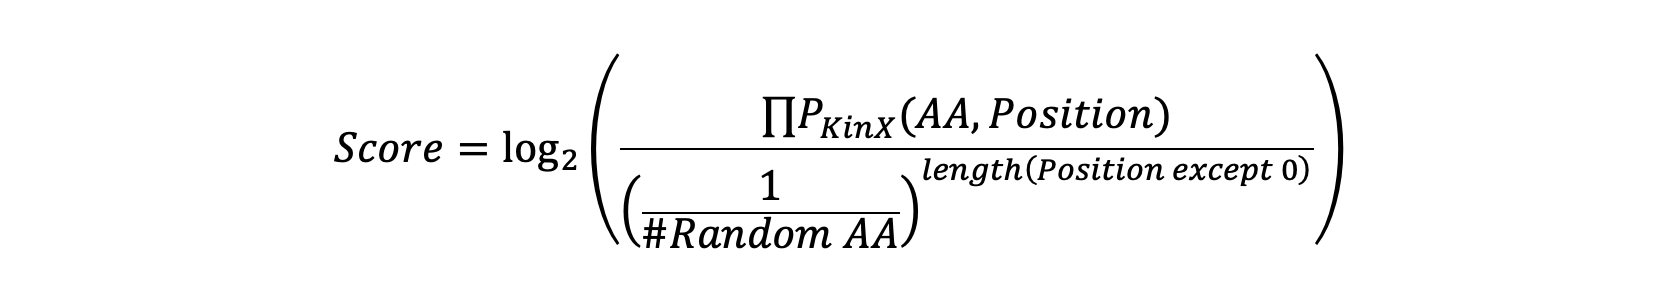

The function implement formula from [Johnson et al. Nature: An atlas of substrate specificities for the human serine/threonine kinome, Supplementary Note2](https://static-content.springer.com/esm/art%3A10.1038%2Fs41586-022-05575-3/MediaObjects/41586_2022_5575_MOESM1_ESM.pdf) (page 160)

***Function2 - sum up***

In [ ]:
#| export
def sumup(values, # list of values, possibilities of amino acids at certain positions
          kinase: str=None, # kinase name
         ):
    "Sum up the possibilities of the amino acids at each position in a phosphorylation site sequence"
    return sum(values)

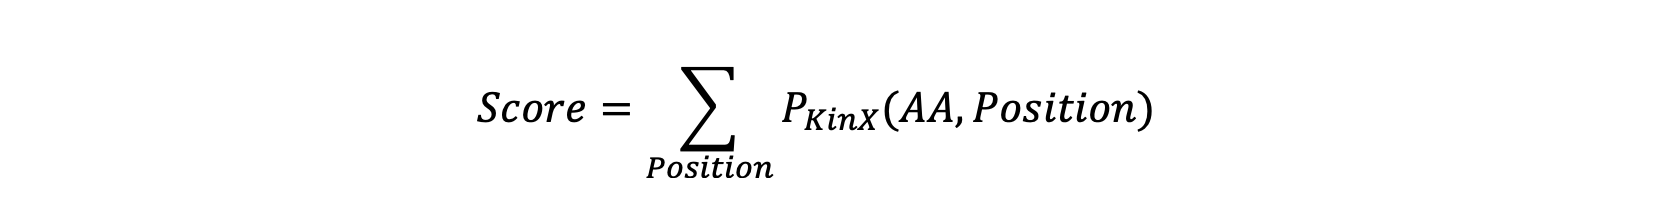

In [ ]:
#| export
def predict_kinase(input_string: str, # site sequence
                   ref: pd.DataFrame, # reference dataframe for scoring
                   func: Callable, # function to calculate score
                   to_lower: bool=False # convert capital STY to lower case
                   ):
    "Predict kinase given a phosphorylation site sequence"
    
    # check whether the middle position is sty
    checker(input_string)
    # convert rare amino acid to _ and lower case other than sty to capital
    input_string = convert_string(input_string)
    
    if to_lower:
        # convert STY in the sequence to lower case
        input_string = STY2sty(input_string)
    
    results=[]
    for kinase,row in tqdm(ref.iterrows(), total=ref.shape[0]):
        r_dict = row.to_dict() # To hash, PSSM dictionary for a single kinase
        
        pos_aa_name=get_dict(input_string)
        pos_aa_name = [key for key in pos_aa_name if key in ref.columns]
    
        pos_aa_val = [r_dict[key] for key in pos_aa_name]

        score = func(pos_aa_val,kinase)
        results.append(score)
    
    print(f'calculated string: {pos_aa_name}')

    out = pd.Series(results,index=ref.index).sort_values(ascending=False)
        
    return out.round(3)

Here we provide different PSSM settings from either PSPA data or kinase-substrate dataset for kinase prediction:

In [ ]:
#| export
# PSPA
param_PSPA = {'ref':Data.get_pspa_original(), 'func':multiply} # Johnson et al. Nature official
# param2 = {'ref':Data.get_pspa_original(), 'func':multiply, 'to_lower': True} # convert all STY to sty in a sequence

# Kinase-substrate dataset, CDDM
param_CDDM = {'ref':Data.get_ks(), 'func':sumup}
param_CDDM_upper = {'ref':Data.get_ks_upper(), 'func':sumup} # specific for all uppercase

In [ ]:
for param in [param_PSPA,param_CDDM,param_CDDM_upper]:
    print(predict_kinase("PSVEPPLsQETFSDL",**param).head())

100%|██████████| 303/303 [00:00<00:00, 9162.49it/s]


calculated string: ['-5V', '-4E', '-3P', '-2P', '-1L', '0s', '1Q', '2E', '3T', '4F']
kinase
ATM       5.037
SMG1      4.385
DNAPK     3.818
ATR       3.507
FAM20C    3.170
dtype: float64


100%|██████████| 289/289 [00:00<00:00, 7863.62it/s]


calculated string: ['-7P', '-6S', '-5V', '-4E', '-3P', '-2P', '-1L', '0s', '1Q', '2E', '3T', '4F', '5S', '6D', '7L']
kinase
ATR      3.064
ATM      2.909
DNAPK    2.270
CK2A1    1.873
TSSK1    1.856
dtype: float64


100%|██████████| 289/289 [00:00<00:00, 8784.49it/s]

calculated string: ['-7P', '-6S', '-5V', '-4E', '-3P', '-2P', '-1L', '0s', '1Q', '2E', '3T', '4F', '5S', '6D', '7L']
kinase
ATR      3.229
ATM      3.038
DNAPK    2.479
CK2A1    2.006
CDK8     1.999
dtype: float64


In [ ]:
#| export
def get_pct(site,ref):
    
    "Replicate the precentile results from The Kinase Library."
    
    # As here we try to replicate the results, we use site.upper(); consider removing it for future version.
    score = predict_kinase(site.upper(),**param_PSPA)
    
    percentiles = {}
    for kinase in score.index: 
        # Get the values from `ref` for this kinase
        ref_values = ref[kinase].values
        # Calculate how many values in `ref` are less than the new score
        less = np.sum(ref_values < score[kinase])
        # Calculate how many values are equal to the new score
        equal = np.sum(ref_values == score[kinase])
        # Calculate the percentile rank
        percentile = (less + 0.5 * equal) / len(ref_values) * 100
        percentiles[kinase] = percentile
        
    pct = pd.Series(percentiles)
    final = pd.concat([score,pct],axis=1)
    final.columns=['log2(score)','percentile']
    return final

In [ ]:
pct_ref = Data.get_pct_ref()

get_pct('PSVEPPLsQETFSDL',pct_ref)

100%|██████████| 303/303 [00:00<00:00, 8685.34it/s]

calculated string: ['-5V', '-4E', '-3P', '-2P', '-1L', '0S', '1Q', '2E', '3T', '4F']


,log2(score),percentile
ATM,5.037,99.822351
SMG1,4.385,99.831819
DNAPK,3.818,99.205315
ATR,3.507,99.680344
FAM20C,3.170,95.370556
...,...,...
PKN1,-7.275,14.070436
P70S6K,-7.295,4.089816
AKT3,-7.375,11.432995
PKCI,-7.742,8.129511


In [ ]:
#| export
def predict_kinase_df(df:pd.DataFrame, # dataframe that contains site sequence
                      seq_col: str, # column name of site sequence
                      ref: pd.DataFrame, # reference df for scoring
                      func, # function to calculate score
                      to_lower: bool=False, # convert all S/T/Y to s/t/y in the sequence
                      ):
    "Predict kinase given a dataframe that contains phosphorylation site sequence and id"
    
    print('input dataframe has a length',df.shape[0])
    print('Preprocessing')
    
    # make a copy of df so that it does not change the original df
    df = df.copy()
    
    # check whether the middle position is sty
    df[seq_col].apply(checker)
    
    # convert rare amino acid to _ and lower case other than sty to capital
    df[seq_col] = df[seq_col].apply(convert_string)
    
    if to_lower:
        # convert STY in the sequence to lower case
        df[seq_col] = df[seq_col].apply(STY2sty)
        
    # cut sequence to fit for reference
    max_value = ref.columns.str[:-1].astype(int).max() # get minimum position from the reference
    min_value = ref.columns.str[:-1].astype(int).min() # get the max position
    df[seq_col] = df[seq_col].apply(partial(cut_seq,min_position=min_value, max_position=max_value))
    
    print('Finish preprocessing')
    
    results=[]
    num = list(set(ref.columns.str[:-1].astype(int)))
    num.sort()
    print(f'Calculating position: {num}')
    
    for kinase,row in tqdm(ref.iterrows(), total=ref.shape[0]):
        r_dict = row.to_dict() # To hash, PSSM dictionary for a single kinase
        result = []
        for input_string in df[seq_col]:
            pos_aa_name = get_dict(input_string)
            
            pos_aa_val = [r_dict[key] for key in pos_aa_name]
            
            score = func(pos_aa_val,kinase)
            result.append(score)

        results.append(result)
        
    out =pd.DataFrame(results,index=ref.index,columns=df.index).T
        
    return out

In [ ]:
data = Data.get_ochoa_site().head()

for param in [param_PSPA,param_CDDM,param_CDDM_upper]:
    display(predict_kinase_df(data,'site_seq', **param))

input dataframe has a length 5
Preprocessing
Finish preprocessing
Calculating position: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]


100%|██████████| 303/303 [00:00<00:00, 6681.74it/s]


kinase,AAK1,ACVR2A,ACVR2B,AKT1,AKT2,AKT3,ALK2,ALK4,ALPHAK3,AMPKA1,...,VRK1,VRK2,WNK1,WNK3,WNK4,YANK2,YANK3,YSK1,YSK4,ZAK
0,-10.959900,-0.580989,0.328868,-3.890850,-3.590503,-5.312027,0.813786,-0.559382,-0.932736,-2.607226,...,-4.682274,-2.854275,-1.668666,-1.526785,-2.964575,-2.877200,-1.792244,-6.282651,-1.715336,-3.204281
1,-6.787549,-0.166112,0.306884,-5.885999,-4.786083,-6.575957,1.561436,-0.865154,-3.399169,-3.260798,...,-5.669906,-2.817085,-4.071192,-3.393741,-5.096516,-1.874000,-1.479976,-8.708810,-3.708147,-6.092628
2,-9.030938,1.231686,1.774661,-6.164209,-5.446345,-8.329813,0.777783,-1.355417,-0.928937,-4.998190,...,-5.832088,-3.243278,-4.249323,-2.749652,-5.053019,0.581384,-0.502630,-6.448245,-1.897494,-2.846533
3,-4.849113,2.271636,2.057240,-2.886034,-2.379830,-3.634907,1.547144,2.735341,-2.825794,-1.696886,...,-2.757951,-1.699232,-1.725384,-0.091196,-0.672545,0.313278,-0.207212,-2.315848,-0.053572,-1.117657
4,-6.596842,-1.387696,-0.956218,-2.834231,-3.794276,-4.968521,-1.862002,-1.717226,-2.653170,-3.514512,...,-1.546328,-1.457323,-1.277532,0.510635,-1.045845,-0.314193,-1.023331,-2.482345,-2.227114,-1.592725


input dataframe has a length 5
Preprocessing
Finish preprocessing
Calculating position: [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]


100%|██████████| 289/289 [00:00<00:00, 6861.39it/s]


kinase,SRC,EPHA3,FES,NTRK3,ALK,EPHA8,ABL1,FLT3,EPHB2,FYN,...,MEK5,PKN2,MAP2K7,MRCKB,HIPK3,CDK8,BUB1,MEKK3,MAP2K3,GRK1
0,0.929569,1.023548,0.989176,0.993497,0.949303,1.035864,0.911981,0.931400,0.980941,0.999884,...,1.280109,1.579914,1.585706,1.521548,1.331723,1.705593,1.281669,1.387180,1.419866,1.808546
1,0.831463,0.876808,0.861939,0.868801,0.794678,0.858953,0.772543,0.754167,0.822913,0.863020,...,1.072389,1.323723,1.319648,1.136658,1.507195,1.556711,1.224350,1.111727,1.115820,1.707075
2,0.793592,0.837832,0.783147,0.809343,0.808309,0.834936,0.777472,0.777312,0.788872,0.816794,...,1.234520,1.758183,1.355396,0.983398,1.290056,1.422390,1.260192,1.113435,1.221784,1.724631
3,0.622633,0.652045,0.602943,0.666497,0.638019,0.616664,0.661643,0.618955,0.607654,0.626510,...,0.915427,1.447707,1.443802,1.233698,1.290700,1.162054,1.060876,0.852917,1.219678,1.351096
4,0.653840,0.619648,0.617121,0.645628,0.635812,0.618403,0.635859,0.625696,0.605016,0.683491,...,0.835344,1.212995,1.333055,1.103199,1.280820,1.219769,1.190424,0.901394,0.952642,1.504753


input dataframe has a length 5
Preprocessing
Finish preprocessing
Calculating position: [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]


100%|██████████| 289/289 [00:00<00:00, 7308.38it/s]


kinase,SRC,EPHA3,FES,NTRK3,ALK,EPHA8,ABL1,FLT3,EPHB2,FYN,...,MEK5,PKN2,MAP2K7,MRCKB,HIPK3,CDK8,BUB1,MEKK3,MAP2K3,GRK1
0,0.991760,1.093712,1.051750,1.067134,1.013682,1.097519,0.966379,0.982464,1.054986,1.055910,...,1.314859,1.635470,1.652251,1.622672,1.362973,1.797155,1.305198,1.423618,1.504941,1.872020
1,0.910262,0.953743,0.942327,0.950601,0.872694,0.932586,0.846899,0.826662,0.915020,0.942713,...,1.175454,1.402006,1.430392,1.215826,1.569373,1.716455,1.270999,1.195081,1.223082,1.793290
2,0.849866,0.899910,0.848895,0.879652,0.874959,0.899414,0.839200,0.836523,0.858040,0.867269,...,1.408003,1.813739,1.454786,1.084522,1.352556,1.524663,1.377839,1.173830,1.305691,1.811849
3,0.803826,0.836527,0.800759,0.894570,0.839905,0.781001,0.847847,0.807040,0.805877,0.801402,...,1.110307,1.703637,1.795092,1.469653,1.549936,1.491344,1.446922,1.055452,1.534895,1.741090
4,0.822793,0.796532,0.792343,0.839882,0.810122,0.781420,0.805251,0.795022,0.790380,0.864538,...,1.062617,1.357689,1.485945,1.249266,1.456078,1.422782,1.376471,1.089629,1.121309,1.697524


In [ ]:
#| export
def get_pct_df(score_df, # output from predict_kinase_df 
               ref, # a reference df for percentile calculation
              ):
    
    "Replicate the precentile results from The Kinase Library."

    # Create an array to hold percentile ranks
    percentiles = np.zeros(score_df.shape)
    
    # Calculate percentiles for each column in a vectorized manner
    for i, kinase in tqdm(enumerate(score_df.columns),total=len(score_df.columns)):
        ref_values = np.sort(ref[kinase].values)
        
        # Use searchsorted to find indices where the scores would be inserted to maintain order
        indices = np.searchsorted(ref_values, score_df[kinase].values, side='right')
        
        # Calculate percentile ranks
        percentiles[:, i] = indices / len(ref_values) * 100

    # Convert the array to a DataFrame with appropriate indices and columns
    percentiles_df = pd.DataFrame(percentiles, index=score_df.index, columns=score_df.columns).astype(float).round(3)
    
    return percentiles_df

In [ ]:
score_df = predict_kinase_df(data,'site_seq', **param_PSPA)
pct_ref = Data.get_pct_ref()

input dataframe has a length 5
Preprocessing
Finish preprocessing
Calculating position: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4]


100%|██████████| 303/303 [00:00<00:00, 6722.74it/s]


In [ ]:
pct = get_pct_df(score_df,pct_ref)
pct

100%|██████████| 303/303 [00:01<00:00, 163.53it/s]


kinase,AAK1,ACVR2A,ACVR2B,AKT1,AKT2,AKT3,ALK2,ALK4,ALPHAK3,AMPKA1,...,VRK1,VRK2,WNK1,WNK3,WNK4,YANK2,YANK3,YSK1,YSK4,ZAK
0,0.458,74.671,84.053,40.272,33.211,33.567,88.644,72.171,87.964,39.757,...,29.815,7.807,51.817,61.251,39.677,32.182,31.327,15.722,64.522,37.746
1,22.403,79.735,83.860,14.659,14.462,18.451,92.567,62.538,55.851,28.697,...,12.757,8.305,15.029,25.499,11.296,53.721,39.987,2.279,14.715,0.783
2,4.115,90.708,93.359,12.239,8.160,5.969,88.406,43.246,88.003,8.176,...,10.769,3.742,13.282,36.930,11.678,93.213,66.309,14.134,60.500,46.700
3,52.441,95.324,94.544,55.475,55.510,56.197,92.514,97.997,65.543,55.549,...,70.543,39.667,50.790,84.612,77.572,90.827,72.860,75.441,90.201,81.427
4,24.954,60.679,69.408,56.285,29.554,38.174,54.628,28.577,68.272,24.793,...,87.502,49.994,58.722,91.131,72.087,83.217,52.870,73.150,52.402,73.957


### Frequency

In [ ]:
#| export
def get_freq(df_k: pd.DataFrame, # a dataframe for a single kinase that contains phosphorylation sequence splitted by their position
             aa_order = [i for i in 'PGACSTVILMFYWHKRQNDEsty'], # amino acid to include in the full matrix 
             aa_order_paper = [i for i in 'PGACSTVILMFYWHKRQNDEsty'], # amino acid to include in the partial matrix
             position = [i for i in range(-7,8)], # position to include in the full matrix
             position_paper = [-5,-4,-3,-2,-1,1,2,3,4] # position to include in the partial matrix
             ):
    
    "Get frequency matrix given a dataframe of phosphorylation sites for a single kinase"
    

    #Count frequency for each amino acid at each position
    melted_k = df_k.melt(
                    value_vars=[i for i in range(-7, 8)],
                    var_name='Position', 
                    value_name='aa')
    
    # Group by Position and Amino Acid and count occurrences
    grouped = melted_k.groupby(['Position', 'aa']).size().reset_index(name='Count')
    

    # Remove wired amino acid
    aa_include = [i for i in 'PGACSTVILMFYWHKRQNDEsty']
    grouped = grouped[grouped.aa.isin(aa_include)].reset_index(drop=True)
    
    # get pivot table
    pivot_k = grouped.pivot(index='aa', columns='Position', values='Count').fillna(0)
    
    # Get frequency by dividing the sum of each column
    freq_k = pivot_k/pivot_k.sum()

    
    # data from the kinase-substrate dataset, and format is Lew's paper's format
    paper = freq_k.reindex(index=aa_order_paper,columns=position_paper,fill_value=0)

    # full pivot data from kinase-substrate dataset
    full = freq_k.reindex(index=aa_order,columns=position, fill_value=0)

    
    return paper,full

In [ ]:
# Get data of a certain kinase
df = Data.get_ks_dataset()
df_k = df.query('kinase=="DYRK2"')
df_k.head() # note that the dataframe contains columns -7 to 7

,Kinase,substrate,kinase_uniprot,kinase_paper,source,-7,-6,-5,-4,-3,...,0,1,2,3,4,5,6,7,kinase,on_tree
0,DYRK2,AEGLRPAsPLGLTQE,Q92630,DYRK2,pplus,A,E,G,L,R,...,s,P,L,G,L,T,Q,E,DYRK2,1
1,DYRK2,GGGAGPVsPQHHELT,Q92630,DYRK2,pplus,G,G,G,A,G,...,s,P,Q,H,H,E,L,T,DYRK2,1
2,DYRK2,LRGNVVPsPLPtRRt,Q92630,DYRK2,pplus,L,R,G,N,V,...,s,P,L,P,t,R,R,t,DYRK2,1
3,DYRK2,GPMRRSKsPADSANG,Q92630,DYRK2,pplus,G,P,M,R,R,...,s,P,A,D,S,A,N,G,DYRK2,1
4,DYRK2,PERsQEEsPPGSTKR,Q92630,DYRK2,pplus,P,E,R,s,Q,...,s,P,P,G,S,T,K,R,DYRK2,1


In [ ]:
# get frequency matrix
paper_format, full = get_freq(df_k)
paper_format.head()

Position,-5,-4,-3,-2,-1,1,2,3,4
aa,,,,,,,,,
P,0.060639,0.066152,0.074972,0.110254,0.110254,0.386313,0.057459,0.135105,0.062361
G,0.076075,0.074972,0.126792,0.061742,0.087100,0.046358,0.068508,0.101883,0.067929
A,0.091510,0.083793,0.061742,0.142227,0.100331,0.089404,0.108287,0.071982,0.080178
C,0.011025,0.006615,0.011025,0.030871,0.017641,0.012141,0.023204,0.018826,0.006682
S,0.036384,0.049614,0.024256,0.036384,0.023153,0.027594,0.028729,0.035437,0.038976


In [ ]:
#| export
def query_gene(df,gene):
    
    "Query gene in the phosphoproteomics dataset"
    
    # query gene in the dataframe
    df_gene = df[df.gene_site.str.contains(f'{gene}_')]
    
    # sort dataframe based on position
    sort_position = df_gene.gene_site.str.split('_').str[-1].str[1:].astype(int).sort_values().index
    df_gene = df_gene.loc[sort_position]
    
    return df_gene

In [ ]:
df = Data.get_combine_site_pplus_ochoa()
df = query_gene(df,'TP53')
df.head()

,site_seq,gene_site,gene,source,num_site,acceptor,-7,-6,-5,-4,...,-2,-1,0,1,2,3,4,5,6,7
115584,__MEEPQSDPSVEPP,TP53_S6|P53_S6,TP53|P53,phosphoplus|ochoa,2,S,_,_,M,E,...,P,Q,S,D,P,S,V,E,P,P
115282,_MDDLMLSPDDIEQW,TP53_S7,TP53,phosphoplus,1,S,_,M,D,D,...,M,L,S,P,D,D,I,E,Q,W
17936,EEPQSDPSVEPPLSQ,TP53_S9|P53_S9,TP53|P53,phosphoplus|ochoa,2,S,E,E,P,Q,...,D,P,S,V,E,P,P,L,S,Q
71937,PSVEPPLSQETFSDL,TP53_S15|P53_S15,TP53|P53,phosphoplus|ochoa,2,S,P,S,V,E,...,P,L,S,Q,E,T,F,S,D,L
21635,EPPLSQETFSDLWKL,TP53_T18,TP53,phosphoplus,1,T,E,P,P,L,...,Q,E,T,F,S,D,L,W,K,L


In [9]:
#| hide
import nbdev; nbdev.nbdev_export()